In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

df = pd.read_csv('../Datasets/preprov1_train.csv',index_col='PassengerId')

In [2]:
df.keys()

Index(['Ticket_class', 'Age', 'Siblings_Spouses', 'Parents_Children', 'Fare',
       'Sex_Male', 'Embarked_Queenstown', 'Embarked_Southampton', 'Survived'],
      dtype='object')

In [3]:
df.head()

,Ticket_class,Age,Siblings_Spouses,Parents_Children,Fare,Sex_Male,Embarked_Queenstown,Embarked_Southampton,Survived
PassengerId,,,,,,,,,
0,1,1.471076,1,0,0.474510,1,0,1,0
1,3,0.839927,0,2,-0.321890,0,0,1,0
2,3,-0.773009,0,0,-0.587729,1,0,1,0
3,1,2.522991,0,0,-0.180463,1,0,1,0
4,3,-0.843137,0,0,-0.579639,1,0,1,0


In [4]:
X = df.drop("Survived",axis =1)
y = df[['Survived']]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [5]:
def plot_y(true_value,predicted_value, model_type = 'regression', model = np.nan):
    from sklearn.metrics import confusion_matrix, roc_curve
    import matplotlib.pyplot as plt
    
    if model_type == 'regression':
        plt.figure(figsize=(10,10))
        plt.scatter(true_value, predicted_value, c='crimson')
        plt.yscale('log')
        plt.xscale('log')

        p1 = max([max(predicted_value), max(true_value)])
        p2 = min([min(predicted_value), min(true_value)])
        plt.plot([p1, p2], [p1, p2], 'b-')
        plt.xlabel('True Values', fontsize=15)
        plt.ylabel('Predictions', fontsize=15)
        plt.axis('equal')
        plt.show();
        
    elif model_type == 'classification':
        confusion = confusion_matrix(true_value,predicted_value)
        
        if model != np.nan:
            
            plt.figure(figsize=(15, 7))
            
            
            #Predicted Probabilities
            plt.subplot(1,2,1)
            y_pred_prob = model.predict_proba(X_test)[:, 1]
            plt.hist(y_pred_prob, bins=8)
            
            # Predicted Probabilities Hist
            plt.xlim(0,1)
            plt.title('Histogram of predicted probabilities')
            plt.xlabel('Predicted probabilities')
            plt.ylabel('Frequency')
#             plt.show()
            
            #ROC_Curve
            plt.subplot(1,2,2)
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
            plt.plot(fpr, tpr)
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.rcParams['font.size'] = 12
            plt.title('ROC curve for classifier')
            plt.xlabel('False Positive Rate (1 - Specificity)')
            plt.ylabel('True Positive Rate (Sensitivity)')
            plt.grid(True)
            
            
            plt.show()
            

In [6]:
def results_classification(y_train,y_pred,name = 'model',model = None,printing = True):
    from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
    results = pd.DataFrame(columns= ['Name','precision','recall','f1'])
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    if printing:
        print(f'Training           {name}...')
        print(f'accuracy:          {accuracy}')
        print(f'Testing precision: {precision}')
        print(f'Testing recall:    {recall}')
        print(f'Testing f1:        {f1}')

    results = results.append({'Name':name,'model':model, 'accuracy':accuracy, 'precision':precision, 'recall':recall, 'f1':f1 },ignore_index = True)
    return results

In [7]:
def train_classification_models(X_train,X_test,y_train,y_test,plotting = True, printing = True):
#     from sklearn.linear_model import LinearRegress
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    import matplotlib.pyplot as plt
    
    flat_list = [item for sublist in y_test.values for item in sublist]
    flat_train = [item for sublist in y_train.values for item in sublist]

    models = {
        'DT': DecisionTreeClassifier(),
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(kernel='poly',degree=3), 
        'RF': RandomForestClassifier(),
        'XGB': XGBClassifier()
    }
    
    df_results = pd.DataFrame(columns= ['Name','precision','recall','f1'])
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        df_results = df_results.append(results_classification(y_train,y_pred,model=model, name = name,printing = printing),ignore_index=True)
        if plotting:
            if name != 'SVM':
                plot_y(flat_list,y_pred,model_type='classification',model = model)
#             else:
#                 plot_y(flat_list,y_pred,model_type='classification')
        
        if (plotting|printing):
            print('-'*50)
        
    return df_results

Training           DT...
accuracy:          0.7605633802816901
Testing precision: 0.7592592592592593
Testing recall:    0.6612903225806451
Testing f1:        0.7068965517241378


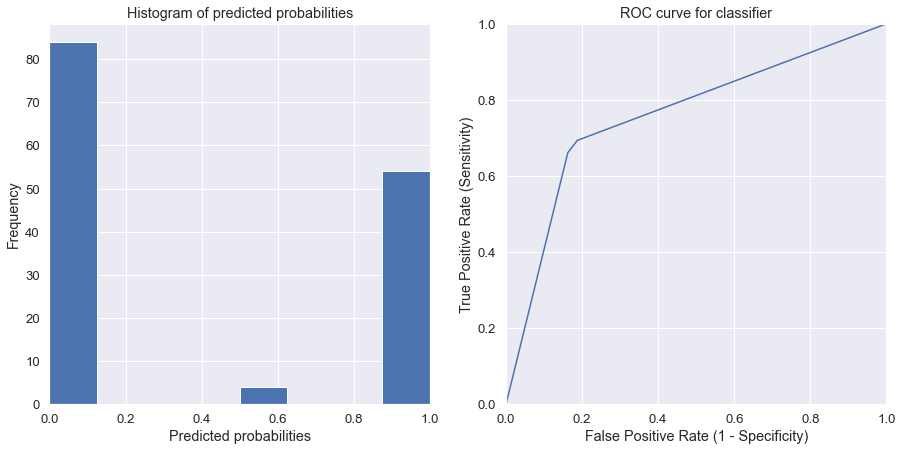

--------------------------------------------------
Training           KNN...
accuracy:          0.795774647887324
Testing precision: 0.7796610169491526
Testing recall:    0.7419354838709677
Testing f1:        0.7603305785123968


G:\Apps\Anaconda\install\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


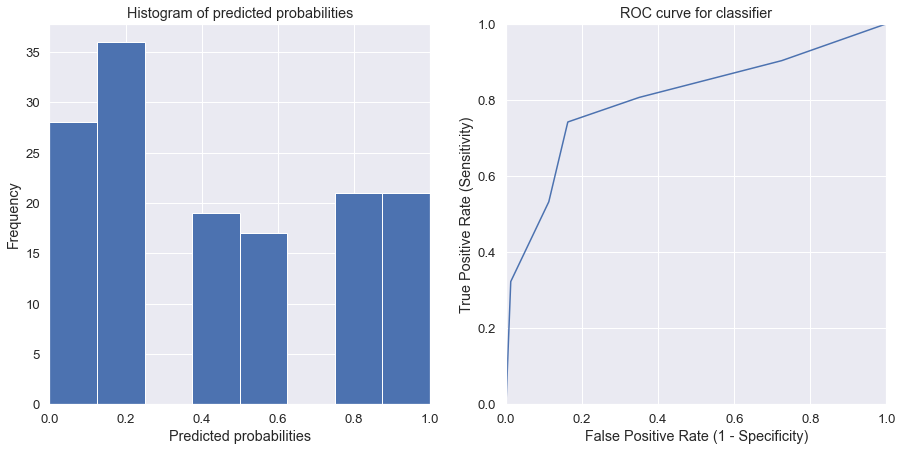

--------------------------------------------------
Training           SVM...
accuracy:          0.7816901408450704
Testing precision: 0.7384615384615385
Testing recall:    0.7741935483870968
Testing f1:        0.7559055118110236
--------------------------------------------------
Training           RF...
accuracy:          0.7746478873239436
Testing precision: 0.7586206896551724
Testing recall:    0.7096774193548387
Testing f1:        0.7333333333333333


G:\Apps\Anaconda\install\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-7-0aaca054c1a2>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


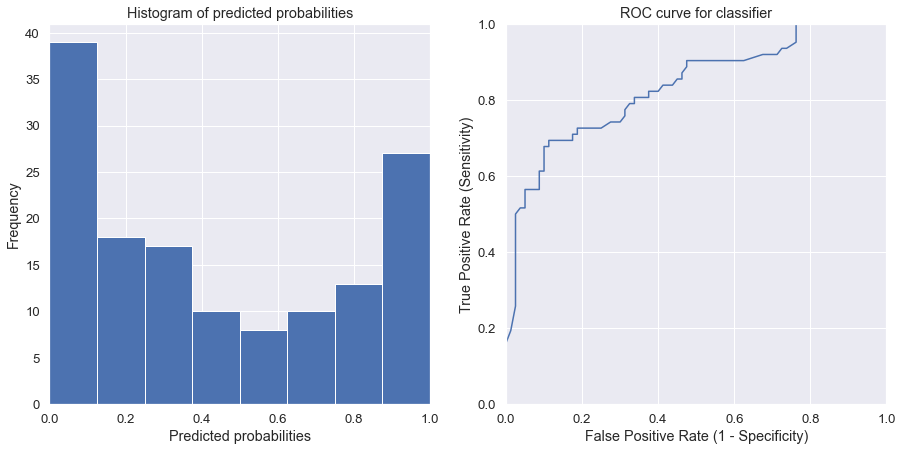

--------------------------------------------------
[12:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


G:\Apps\Anaconda\install\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
G:\Apps\Anaconda\install\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Apps\Anaconda\install\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training           XGB...
accuracy:          0.7746478873239436
Testing precision: 0.7586206896551724
Testing recall:    0.7096774193548387
Testing f1:        0.7333333333333333


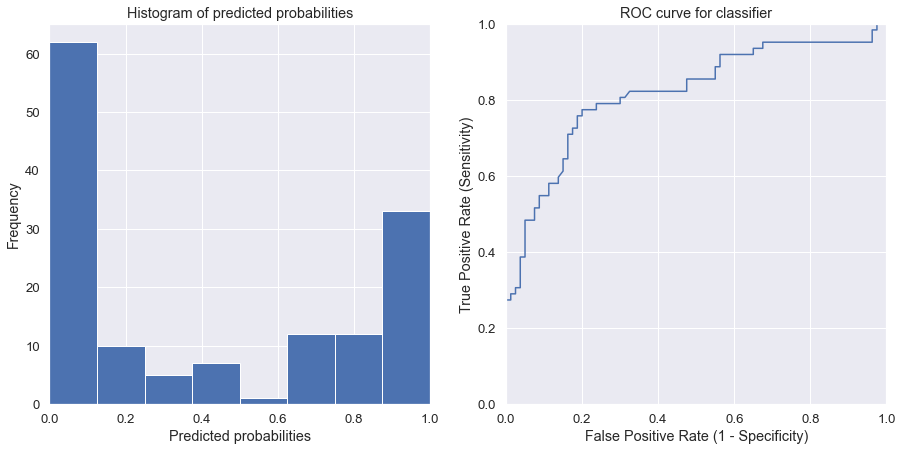

--------------------------------------------------


In [8]:
results = train_classification_models(X_train,X_test,y_train,y_test)

In [9]:
results

,Name,precision,recall,f1,accuracy,model
0,DT,0.759259,0.661290,0.706897,0.760563,DecisionTreeClassifier()
1,KNN,0.779661,0.741935,0.760331,0.795775,KNeighborsClassifier()
2,SVM,0.738462,0.774194,0.755906,0.781690,SVC(kernel='poly')
3,RF,0.758621,0.709677,0.733333,0.774648,"(DecisionTreeClassifier(max_features='auto', r..."
4,XGB,0.758621,0.709677,0.733333,0.774648,"XGBClassifier(base_score=0.5, booster='gbtree'..."


# Precision Vs Recall

### Precision:
if we favor False negatives over False Positives, XGB Boost is performing above the other models and would be the best suiting candidate.

### recall:
if we favor False Positives over False Negatives, SVM is a clear winner and would be the best suilted model for the task.

### Business Use case:
In this situation, Neither Precision nor recall is more favored over the other... so we'll use accuracy_score & f1_score as a general metric for the model performance

## Final Verdict

Random Forest has the highest Avergae f1/Accuracy score in all of the models